In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data
data = pd.read_csv('sales.csv')

In [3]:
df_test = pd.read_csv("real_data.csv")

In [4]:
df_test.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [5]:
# Display the first 5 rows
data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0


In [6]:
# Display the Last 5 rows
data.tail()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
592556,273284,620,6,2015-02-28,852,1,0,0,0,10070
592557,95245,487,6,2015-02-28,780,1,0,0,0,7723
592558,625491,707,6,2015-02-28,632,1,0,0,0,6451
592559,643088,786,6,2015-02-28,196,1,0,0,0,1369
592560,467551,370,6,2015-02-28,619,1,0,0,0,7512


In [7]:
# Summary statistics for numeric columns
data.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000
mean,356039.480762,558.463546,4.002315,634.848002,0.831509,0.379419,0.181418,5744.577431
std,205596.545847,321.957991,1.995855,465.330476,0.374302,0.485243,0.385364,3832.896126
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177871.000000,280.000000,2.000000,404.000000,1.000000,0.000000,0.000000,3703.000000
50%,356159.000000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5702.000000
75%,534138.000000,837.000000,6.000000,839.000000,1.000000,1.000000,0.000000,7808.000000
max,712044.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,38037.000000


In [8]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           592561 non-null  int64 
 1   store_ID             592561 non-null  int64 
 2   day_of_week          592561 non-null  int64 
 3   date                 592561 non-null  object
 4   nb_customers_on_day  592561 non-null  int64 
 5   open                 592561 non-null  int64 
 6   promotion            592561 non-null  int64 
 7   state_holiday        592561 non-null  object
 8   school_holiday       592561 non-null  int64 
 9   sales                592561 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 45.2+ MB


In [9]:
# Display the data types
data.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [10]:
encoder = LabelEncoder()
data["store_ID"] = encoder.fit_transform(data["store_ID"])

In [11]:
df_test["store_ID"] = encoder.fit_transform(df_test["store_ID"])

In [12]:
data["store_ID"].unique()

array([ 165,  277,  518, ...,  486, 1102,  101], dtype=int64)

In [13]:
data["store_ID"].value_counts()

store_ID
1061    594
387     589
324     589
1044    588
639     587
       ... 
164     399
341     397
858     395
1064    395
541     388
Name: count, Length: 1115, dtype: int64

In [14]:
# Get unique values
data['state_holiday'].unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

In [15]:
# Count the occurrences of each unique value
data['state_holiday'].value_counts()

state_holiday
0    572395
a     11363
b      3167
c      2899
0      2737
Name: count, dtype: int64

In [16]:
data['school_holiday'].unique()


array([1, 0], dtype=int64)

In [17]:
data['school_holiday'].value_counts()

school_holiday
0    485060
1    107501
Name: count, dtype: int64

In [18]:
data['open'].unique()

array([0, 1], dtype=int64)

In [19]:
data['promotion'].unique()

array([0, 1], dtype=int64)

In [20]:
# Check if all values in the dataset are missing (NaN)
data.all().isna()

Unnamed: 0             False
store_ID               False
day_of_week            False
date                   False
nb_customers_on_day    False
open                   False
promotion              False
state_holiday          False
school_holiday         False
sales                  False
dtype: bool

In [21]:
# Drop the 'Unnamed: 0'
data = data.drop(columns=['Unnamed: 0'],axis=1)
data.head(5)


,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,165,2,2013-01-01,0,0,0,a,1,0
1,277,2,2013-01-01,0,0,0,a,1,0
2,518,2,2013-01-01,0,0,0,a,1,0
3,233,2,2013-01-01,0,0,0,a,1,0
4,269,2,2013-01-01,0,0,0,a,1,0


In [22]:
df_test = df_test.drop(columns=['Unnamed: 0'],axis=1)


In [23]:
# Convert the 'state_holiday' column to string data type.
data['state_holiday'] = data['state_holiday'].astype(str)
df_test['state_holiday'] = df_test['state_holiday'].astype(str)

In [24]:
# Map the values in 'state_holiday' column to integers
data['state_holiday'] = data['state_holiday'].map({
    "a":1,
    "0":0,
    "b":1,
    "c":1, 
    '0':0
    })
# and convert the column to the 'Int64' type
data['state_holiday'] = data['state_holiday'].astype('Int64')
#Check
data['state_holiday'].unique()


<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [25]:
# Map the values in 'state_holiday' column to integers
df_test['state_holiday'] = df_test['state_holiday'].map({
    "a":1,
    "0":0,
    "b":1,
    "c":1, 
    '0':0
    })
# and convert the column to the 'Int64' type
df_test['state_holiday'] = df_test['state_holiday'].astype('Int64')
#Check
df_test['state_holiday'].unique()


<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [26]:
# Convert the 'date' column to datetime format 
data['date'] = pd.to_datetime(data['date'])
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day


In [27]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test["year"] = df_test["date"].dt.year
df_test["month"] = df_test["date"].dt.month
df_test["day"] = df_test["date"].dt.day


In [28]:
data.drop('date', axis=1, inplace=True)

In [29]:
df_test.drop('date', axis=1, inplace=True)

In [30]:
print(data.dtypes)

store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday          Int64
school_holiday         int64
sales                  int64
year                   int32
month                  int32
day                    int32
dtype: object


In [31]:
data.isnull().sum()


store_ID               0
day_of_week            0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
year                   0
month                  0
day                    0
dtype: int64

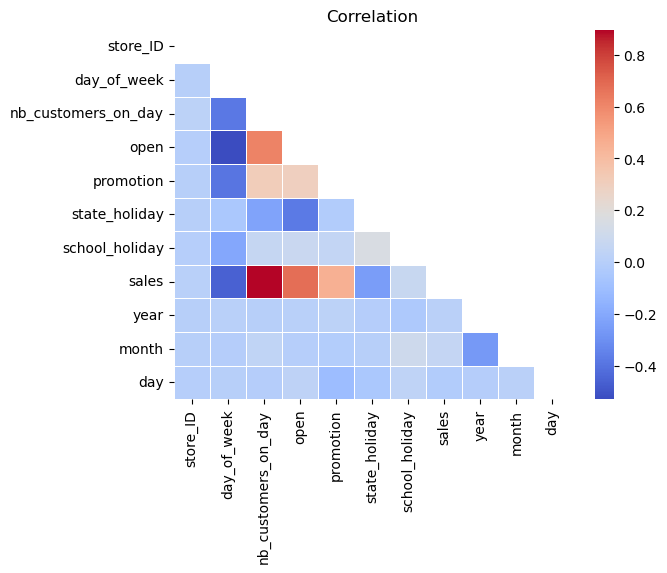

In [32]:
# Correlation
numeric = data.select_dtypes(include=["number"])
crr = numeric.corr()
mask = np.triu(np.ones_like(crr, dtype=bool))

plt.Figure(figsize=(50,50))
sns.heatmap(crr,annot=True,mask=mask ,cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title("Correlation")
plt.show()



## Splitting The Data into Training And Testing Dataset

In [33]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=["sales"])
y = data["sales"]

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Initialize and train a Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
print(rf.n_features_in_)  # Should be 10

10


In [37]:
predictions = rf.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error (MAE): 510.01230371351664
R-squared (R2) Score: 0.9516737946792688


In [60]:

missing_cols = set(X_train.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[X_train.columns] #reorder the columns

# Make predictions
results = []
for index, row in df_test.iterrows():
    X_row = row.values.reshape(1, -1)
    y_pred = rf.predict(X_row)[0]
    results.append([index, y_pred])

df_results = pd.DataFrame(results, columns=["Row", "Predicted"])
df_results.to_csv("real_data_predictions.csv", index=False)

print("Predictions for real_data.csv saved to real_data_predictions.csv")

Predictions for real_data.csv saved to real_data_predictions.csv


In [45]:
results = []

for index, row in df_test.iterrows():
    X_row = row.values.reshape(1, -1)  # Prepare single row
    
    # Predict for one row
    y_pred = rf.predict(X_row)[0]  # Extract single prediction
    
    # Save results
    results.append([index + 1, y_pred])

df_results = pd.DataFrame(results, columns=["Row", "Predicted"])

df_results.to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv


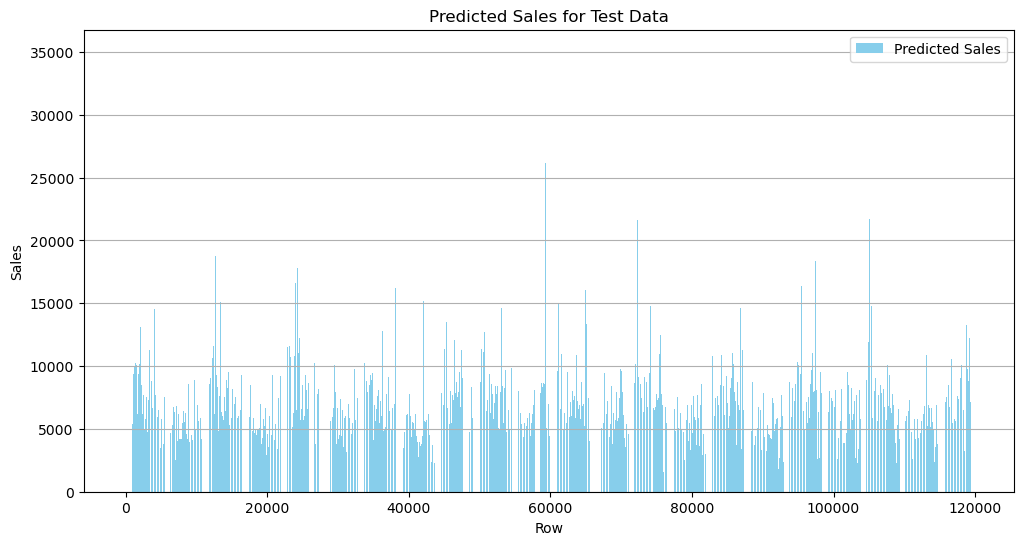

In [48]:

df_results = pd.read_csv("test_predictions.csv")

# Create a bar chart for the predicted sales values
plt.figure(figsize=(12, 6))
plt.bar(df_results['Row'], df_results['Predicted'], color='skyblue', label='Predicted Sales')
plt.title('Predicted Sales for Test Data')
plt.xlabel('Row')
plt.ylabel('Sales')
plt.legend()
plt.grid(axis='y')
plt.show()

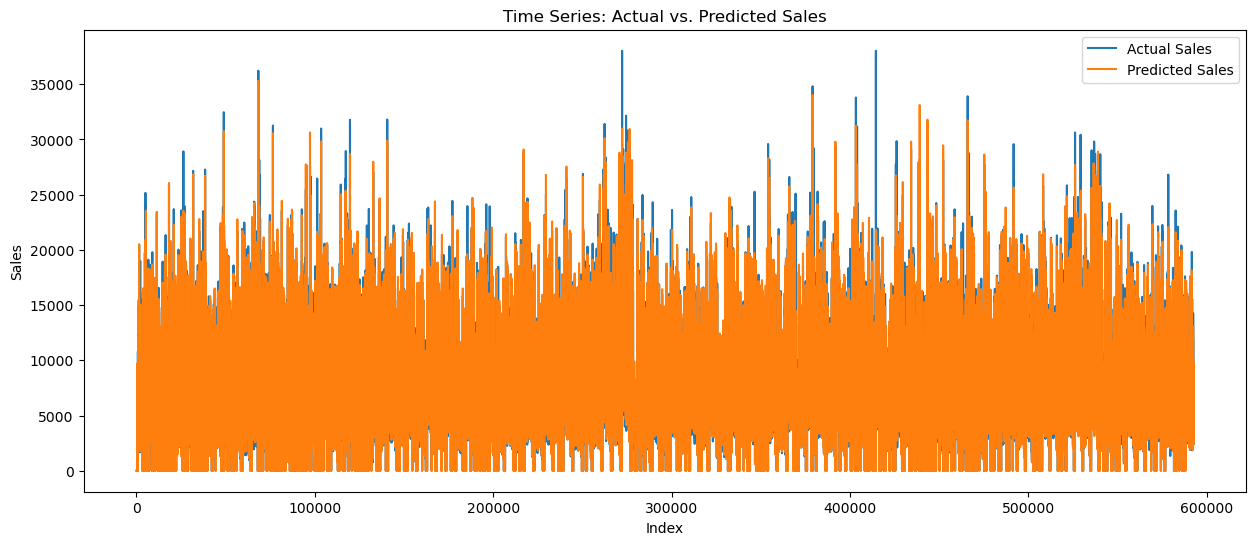

In [56]:


# Time series visualization of actual vs. predicted (if you have a date index in test)
if 'day_of_week' in X_test.columns:
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    test_results.sort_index(inplace=True)
    plt.figure(figsize=(15, 6))
    plt.plot(test_results['Actual'], label='Actual Sales')
    plt.plot(test_results['Predicted'], label='Predicted Sales')
    plt.xlabel("Index")
    plt.ylabel("Sales")
    plt.title("Time Series: Actual vs. Predicted Sales")
    plt.legend()
    plt.show()